In [3]:
import os, sklearn, pandas, numpy as np
from sklearn import svm
import skimage
from skimage import io, filters
from utils import utils # custom functions, in local environment
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# custom scripts
import config # params, constants
import data # functions that mutate outr data

# Prepare dataset

In [9]:
# labels = pandas.read_csv('../datasets/labels.csv')
# dataset = data.Dataset(config.dataset_dir, label_name='breed')

# train_list is just a list of image names, not te actual data
# dataset = namedtuple('Dataset',['train','test','labels'])
dataset = data.init_dataset()
labels = dataset.labels
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,7a5ac22642a9ad1ede2461cdf7d27050,scottish_deerhound
freq,1,126


In [16]:
# create a label dicts to convert labels to numerical data and vice versa
# the order is arbitrary, as long as we can convert them back to the original classnames
unique_labels = set(labels['breed'])
dict_index_to_label = data.dict_index_to_label(unique_labels)
dict_label_to_index = data.dict_label_to_index(unique_labels)
dict_label_to_index

{'affenpinscher': 108,
 'afghan_hound': 66,
 'african_hunting_dog': 59,
 'airedale': 103,
 'american_staffordshire_terrier': 76,
 'appenzeller': 55,
 'australian_terrier': 12,
 'basenji': 16,
 'basset': 53,
 'beagle': 40,
 'bedlington_terrier': 9,
 'bernese_mountain_dog': 22,
 'black-and-tan_coonhound': 60,
 'blenheim_spaniel': 69,
 'bloodhound': 106,
 'bluetick': 81,
 'border_collie': 20,
 'border_terrier': 119,
 'borzoi': 62,
 'boston_bull': 14,
 'bouvier_des_flandres': 0,
 'boxer': 47,
 'brabancon_griffon': 100,
 'briard': 74,
 'brittany_spaniel': 112,
 'bull_mastiff': 93,
 'cairn': 25,
 'cardigan': 90,
 'chesapeake_bay_retriever': 109,
 'chihuahua': 75,
 'chow': 94,
 'clumber': 8,
 'cocker_spaniel': 101,
 'collie': 118,
 'curly-coated_retriever': 6,
 'dandie_dinmont': 77,
 'dhole': 18,
 'dingo': 17,
 'doberman': 30,
 'english_foxhound': 28,
 'english_setter': 110,
 'english_springer': 64,
 'entlebucher': 65,
 'eskimo_dog': 86,
 'flat-coated_retriever': 98,
 'french_bulldog': 52,
 '

In [17]:
dict_label_to_index['beagle']

40

In [18]:
# access a specific value
sample_id = 'ff63fa05a58473138848f80840064d23'
breed = labels.loc[labels['id'] == sample_id]
print(breed['breed'].item())
breed

affenpinscher


,id,breed
10197,ff63fa05a58473138848f80840064d23,affenpinscher


len(img_list) 10222
(300, 400, 3) 360000 uint8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


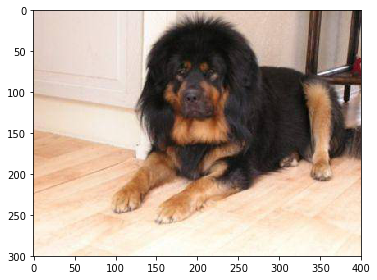

In [19]:
# Import train+test data
img_dir = config.dataset_dir + 'train/'
img_list = dataset.train # ignore the test images for now
print('len(img_list)',len(img_list))
img_name = img_list[1]
img = data.read_img('train/',img_name)
# all imgs should be equally sized # TODO function to crop photos?
dimensions = img.shape
print(img.shape, img.size, img.dtype)
io.imshow(img)

# Import test data

In [20]:
# Collect test data (+labels)
# ignore images that have different dimensions
def extract_data(img_list):
    print('extract data:',len(img_list))
    global labels
    global dict_label_to_index
    img_data = []
    img_labels = []
    for img_name in img_list:
        img = data.read_img('train/',img_name)
        if img.shape == dimensions:
            img_data.append(img.flatten())
            breed = data.filename_to_class(labels,img_name)
            breed_index = dict_label_to_index[breed]
            img_labels.append(breed_index)
    #         else:
    #             print('dims')
    return (img_data, img_labels)

train_data, train_labels = extract_data(dataset.train[0:300])
print(len(train_data),len(train_labels))

extract data: 300
7 7


In [21]:
# SVM
clf = svm.SVC()
clf.fit(train_data, train_labels)
print('done')

done


In [22]:
def predict_and_test(test_data=[],test_labels=[]):
    result = clf.predict(test_data)
    print(test_labels == result, result)

In [ ]:
print(len(train_list))

test_data, test_labels = extract_data(train_list[0:200])
print('len =',len(test_data),len(test_labels))
test_labels

In [ ]:
# test classifier on previously seen data

test_data, test_labels = extract_data(train_list[10:200])
print('len =',len(test_data),len(test_labels))
predict_and_test(test_data, test_labels)
print(test_labels)

In [ ]:
# test classifier on new data

test_data, test_labels = extract_data(train_list[600:900])
print('len =',len(test_data),len(test_labels))
predict_and_test(test_data, test_labels)

In [ ]:
# gen noise (images with random pixel values)
noise = []
noise_labels = []
for img_name in img_list[:90]:
    img = data.read_img('train/',img_name)
    if img.shape == dimensions:
        random_img = data.gen_random_img(img)
        noise.append(random_img.flatten())
        noise_labels.append(0) # TODO this is unused


# TODO use random noise to optimize the classifier
clf.predict(noise)

# output should be a class "nothing"